# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **religious events or traditions** (see below) for the region of **Taipei, Taipei City, Taiwan**, or **Taiwan** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **Taipei, Taipei City, Taiwan** to Ann Arbor, USA. In that case at least one source file must be about **Taipei, Taipei City, Taiwan**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **Taipei, Taipei City, Taiwan** and **religious events or traditions**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **religious events or traditions**?  For this category you might consider calendar events, demographic data about religion in the region and neighboring regions, participation in religious events, or how religious events relate to political events, social movements, or historical events.

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)

## Introduction
Last month I went to a meeting discussing on renovation of agriculture, and the government released a lot of datasets in the opendata website. I'm very interested in how to avoid market price crash and improve the wealth of the farmers in Taiwan. So I picked some datasets and tried digging into it, hope to find out some correlation between the crops quantities and market prices.

In [1]:
#import necesarry modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load_datasets
veges = pd.read_csv('datasets/veges.csv')
#remove columns without data
veges = veges.iloc[:, :-1]
veges.replace('-', 0, inplace = True)
veges.iloc[:, 3:] = veges.iloc[:, 3:].astype("float64")
veges2016 = veges[veges['年度']==2016]
#veges2016.iloc[:, 3:] = veges2016.iloc[:, 3:].astype("float64")
veges2016.head()

,年度,地區別,蔬菜類別,種植面積,收穫面積,每公頃平均產量,產量
0,2016,新北市,蘿蔔,93.0,93.0,30040.0,2800.0
1,2016,台北市,蘿蔔,58.0,58.0,9036.0,527.0
2,2016,桃園市,蘿蔔,19.0,19.0,19783.0,374.0
3,2016,台中市,蘿蔔,73.0,73.0,28746.0,2106.0
4,2016,台南市,蘿蔔,232.0,231.0,43963.0,10171.0


In [3]:
veges2016.iloc[0:10, 3:].dtypes

種植面積       float64
收穫面積       float64
每公頃平均產量    float64
產量         float64
dtype: object

In [4]:
#check how many kinds of veges were produced
veges2016['蔬菜類別'].unique()

array(['蘿蔔', '胡蘿蔔', '其他根菜類', '薑', '芋', '馬鈴薯', '蔥', '蔥頭', '洋蔥', '韭菜', '蒜',
       '蒜頭', '荸薺', '竹筍', '蘆筍', '筊白筍', '其他莖菜類', '甘藍', '大芥菜', '結球白菜',
       '不結球白菜', '甕菜', '芹菜', '其他葉菜類', '花椰菜', '金針菜', '越瓜', '胡瓜', '冬瓜', '苦瓜',
       '茄子', '菜豆', '豌豆', '毛豆', '番茄', '番椒', '洋香瓜', '西瓜', '香瓜', '草莓',
       '其他果菜類'], dtype=object)

In [5]:
agri_price = pd.read_csv('datasets/agri_price.csv')
agri_price = agri_price.iloc[:, :-1]
agri_price.head()

,作物,年份,1月價格,2月價格,3月價格,4月價格,5月價格,6月價格,7月價格,8月價格,9月價格,10月價格,11月價格,12月價格
0,蘿蔔(元/公斤),2017年,5.59,5.96,6.85,8,9.18,8.92,-,6.20,5.82,8.32,-,-
1,白玉蘿蔔(元/公斤),2017年,-,-,-,-,-,-,-,13,12.83,-,-,-
2,胡蘿蔔(元/公斤),2017年,16.95,8.03,7.04,6.67,9.33,12.67,13.33,-,-,11.67,-,-
3,山藥(元/公斤),2017年,36.75,35,38.67,40,-,-,-,-,54.33,46,-,-
4,牛蒡(元/公斤),2017年,-,-,22.5,22.67,-,-,-,-,-,-,-,-


In [6]:
#agri_price.describe()

In [7]:
# "-" need to be replaced with np.nan()
agri_price.replace('-', 0, inplace = True)
agri_price.iloc[:, 2:].describe()

,1月價格,2月價格,3月價格,4月價格,5月價格,6月價格,7月價格,8月價格,9月價格,10月價格,11月價格,12月價格
count,2975,2975,2975,2975,2975,2975,2975,2973,2973,2975,2975,2975
unique,1388,1378,1441,1472,1459,1461,1432,1426,1395,1448,1362,1333
top,0,0,0,0,0,0,0,0,0,0,0,0
freq,1202,1192,1050,965,1030,1056,1090,1084,1118,1079,1204,1283


In [8]:
agri_price.dtypes

作物       object
年份       object
1月價格     object
2月價格     object
3月價格     object
4月價格     object
5月價格     object
6月價格     object
7月價格     object
8月價格     object
9月價格     object
10月價格    object
11月價格    object
12月價格    object
dtype: object

In [9]:
def renew_dtype(df):
    months = 12
    for i in range(2, 2+months):
        df.iloc[:, i] = df.iloc[:, i].astype('float64')
    
    return df

In [10]:
renew_dtype(agri_price)

,作物,年份,1月價格,2月價格,3月價格,4月價格,5月價格,6月價格,7月價格,8月價格,9月價格,10月價格,11月價格,12月價格
0,蘿蔔(元/公斤),2017年,5.59,5.96,6.85,8.00,9.18,8.92,0.00,6.20,5.82,8.32,0.00,0.00
1,白玉蘿蔔(元/公斤),2017年,0.00,0.00,0.00,0.00,0.00,0.00,0.00,13.00,12.83,0.00,0.00,0.00
2,胡蘿蔔(元/公斤),2017年,16.95,8.03,7.04,6.67,9.33,12.67,13.33,0.00,0.00,11.67,0.00,0.00
3,山藥(元/公斤),2017年,36.75,35.00,38.67,40.00,0.00,0.00,0.00,0.00,54.33,46.00,0.00,0.00
4,牛蒡(元/公斤),2017年,0.00,0.00,22.50,22.67,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,生薑(嫩薑)(元/公斤),2017年,0.00,0.00,0.00,0.00,53.83,41.50,39.83,42.00,40.50,38.17,0.00,0.00
6,生薑(老薑粉薑)(元/公斤),2017年,25.56,29.22,33.10,34.89,36.03,46.67,40.00,50.00,39.33,35.00,0.00,0.00
7,芋頭(元/公斤),2017年,36.71,39.49,40.50,40.00,41.00,35.67,30.33,30.68,32.32,32.42,0.00,0.00
8,綠竹筍(元/公斤),2017年,0.00,0.00,0.00,139.17,143.47,91.11,100.55,85.53,77.07,85.25,0.00,0.00
9,烏殼;綠竹筍(元/公斤),2017年,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [11]:
#plot on world map
import mplleaflet

def production_plot(df, latitude, longitude, vege_name):
    '''
    input: veges_year dataset, latitude, longitude, vege_name in the dataset
    output: map shows where has the greatest farmland and most production
    '''
    plt.figure(figsize = (6,10))
    choosed = df.loc[df['蔬菜類別'] == vege_name, :]
    mean_farmsize = choosed['種植面積'].mean()
    for i in range(len(choosed)):
        plt.scatter(longitude[choosed.iloc[i, 1]], latitude[choosed.iloc[i, 1]], 
                    s = choosed.iloc[i, 3] / mean_farmsize * 600, 
                    c = choosed.iloc[i, -1], cmap = 'winter', alpha = 0.6, 
                    vmin = choosed.iloc[:, -1].quantile(0.01), vmax = choosed.iloc[:, -1].quantile(0.95))
    return mplleaflet.display()

In [12]:
#before drawing scatter on the map, latitude and longitude is necessary
#import scraping modules
from bs4 import BeautifulSoup
import requests
import html5lib

def get_map_info(url):
    '''
    load url from:
    https://byronhu.wordpress.com/2013/09/09/%E5%8F%B0%E7%81%A3%E7%B8%A3%E5%B8%82%E7%B6%93%E7%B7%AF%E5%BA%A6/
    scrap for latitude and longitude info from the table built in the url
    '''
    req = requests.get(url)
    req.encoding='utf-8' #even the html applies utf-8, still need to set the encoding process again
    soup = BeautifulSoup(req.text, 'html.parser')
    tables = soup('table')
    
    latitude = {}
    longitude = {}
    tags = []
    for tag in soup.table.find_all('td'):
        tags.append(tag.p.string)
    n = len(tags)
    
    for i in range(0,n,3):
        if tags[i][0] == '臺':
            latitude['台' + tags[i][1:]] = tags[i+2]
            longitude['台' + tags[i][1:]] = tags[i+1]
        elif tags[i][0] == '桃':
            latitude['桃園市'] = tags[i+2]
            longitude['桃園市'] = tags[i+1]
        else:
            latitude[tags[i]] = tags[i+2]
            longitude[tags[i]] = tags[i+1]
    return latitude, longitude

In [13]:
url = "https://byronhu.wordpress.com/2013/09/09/%E5%8F%B0%E7%81%A3%E7%B8%A3%E5%B8%82%E7%B6%93%E7%B7%AF%E5%BA%A6/"
latitude, longitude = get_map_info(url)

In [14]:
#longitude

In [15]:
production_plot(veges2016, latitude, longitude, '茄子')

In [16]:
agri_price2016 = agri_price.loc[agri_price['年份'] == '2016年', :]
agri_price2016.head()

,作物,年份,1月價格,2月價格,3月價格,4月價格,5月價格,6月價格,7月價格,8月價格,9月價格,10月價格,11月價格,12月價格
182,蘿蔔(元/公斤),2016年,6.44,14.28,16.77,13.40,11.87,13.25,14.64,9.88,10.00,20.01,20.00,9.15
183,白玉蘿蔔(元/公斤),2016年,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
184,胡蘿蔔(元/公斤),2016年,16.63,15.63,15.36,18.17,20.08,23.00,24.23,24.53,25.50,38.67,37.83,27.67
185,山藥(元/公斤),2016年,40.50,40.00,40.00,40.00,0.00,0.00,0.00,0.00,50.83,52.83,43.83,41.00
186,牛蒡(元/公斤),2016年,0.00,0.00,27.67,26.33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [17]:
agri_price2016['作物'].unique()

array(['蘿蔔(元/公斤)', '白玉蘿蔔(元/公斤)', '胡蘿蔔(元/公斤)', '山藥(元/公斤)', '牛蒡(元/公斤)',
       '生薑(嫩薑)(元/公斤)', '生薑(老薑粉薑)(元/公斤)', '芋頭(元/公斤)', '綠竹筍(元/公斤)',
       '烏殼;綠竹筍(元/公斤)', '麻竹筍(元/公斤)', '桂竹筍(生筍)(元/公斤 )', '轎篙筍(元/公斤)',
       '白蘆筍(元/公斤)', '綠蘆筍(元/公斤)', '茭白筍(帶殼)(元/公斤)', '大芥菜(鮮食)(元/公斤)',
       '馬鈴薯(食用)(元/公斤)', '加工麻竹筍(元/公斤)', '青蔥(元/公斤)', '青蔥(北蔥)(元/公斤)',
       '蔥頭(元/公斤)', '洋蔥(內銷)(元/公斤)', '洋蔥(外銷)(元/公斤)', '青蒜(元/公斤)',
       '蒜頭(蒜球)(元/公斤)', '荸薺(元/公斤)', '韭菜(元/公斤)', '韭黃(元/公斤)',
       '蕹菜(空心菜)(元/公斤)', '芹菜(土芹菜)(元/公斤)', '甘藍(元/公斤)', '甘藍芽(元/公斤)',
       '小白菜(元/公斤)', '青江白菜(元/公斤)', '結球白菜(元/ 公斤)', '結球白菜(成功白)(元/公斤)',
       '菠菜(元/公斤)', '芥藍(元/公斤)', '莧菜(元/公斤)', '本島萵苣(元/公斤)', '萵苣(油麥菜)(元/公斤)',
       '茼萵(元/公斤)', '花椰菜(白)(元/公斤)', '青花苔(元/公斤)', '金針菜  (乾)(元/公斤)',
       '越瓜(元/公斤)', '胡瓜(黑刺)(元/公斤)', '胡瓜(白刺)(元/公斤)', '花胡瓜(元/公斤)',
       '冬瓜(元/公斤)', '苦瓜(元/公斤)', '絲瓜(菱角)(元/公斤)', '絲瓜(元/公斤)', '扁蒲(元/公斤)',
       '茄子(元/公斤)', '番茄(黑柿)(元/公斤)', '小蕃茄(聖女)(元/公斤)', '甜椒(青椒)(元/公斤)',
       '西瓜(大粒)(元/公斤)', '西瓜(小粒)(元/公斤)', '西瓜(無子)(元/公斤)', '洋香瓜(元/ 公

In [18]:
import seaborn as sns
def compare_vege_price(veges_df, price_df, vege_name):
    '''
    input: veges, price, vege_name(must be included in both datasets, 
        for example: 蘿蔔, 草莓, 胡蘿蔔, 馬鈴薯, 蔥(青蔥), 蔥頭, 洋蔥, 薑(嫩薑/老薑), 韭菜, 蒜(青蒜), 蒜頭,
        荸薺, 竹筍(X竹筍), 蘆筍(X蘆筍), 茭白筍, 甘藍, 大芥菜, 結球白菜, 芹菜, 花椰菜, 金針菜, 越瓜, 胡瓜, 冬瓜,
        苦瓜, 茄子, 菜豆, 豌豆, 毛豆, 番茄, 洋香瓜, 西瓜, 香瓜, etc.)
    
    output: line plot representing how the price goes
    '''
    plt.figure(figsize = (12,8))
    plt.rcParams['font.family']='Verdana'
    colors = ['r', 'b', 'g']
    plt.subplot(121)
    for i in range(2016, 2013, -1):
        year = str(i) + '年'
        #selected 作物 first, then separate by year
        choosed = price_df[price_df['作物'].str.contains(vege_name)].loc[price_df['年份'] == year, :]
        plt.plot(np.arange(1, 13), choosed.iloc[:,2:].values.squeeze(), '-', 
                 color = colors[2016-i], label = str(i))
        
    plt.xlabel('Month')
    plt.ylabel('Average Price')
    plt.title('Price movement')
    plt.xticks(np.arange(1, 13), range(1, 13))
    plt.legend()
    
    plt.subplot(122)
    
    for i in range(2016, 2013, -1):
        year = i
        choosed = veges_df[veges_df['蔬菜類別'].str.contains(vege_name)].loc[veges_df['年度'] == year, :]
        plt.bar(i, choosed.iloc[:,-1].sum(), color = 'grey')
    plt.xlabel('Year')
    plt.xticks(range(2016, 2013, -1), range(2016, 2013, -1))
    plt.ylabel('Production')
    plt.title('Production Diff')
    
    plt.show()

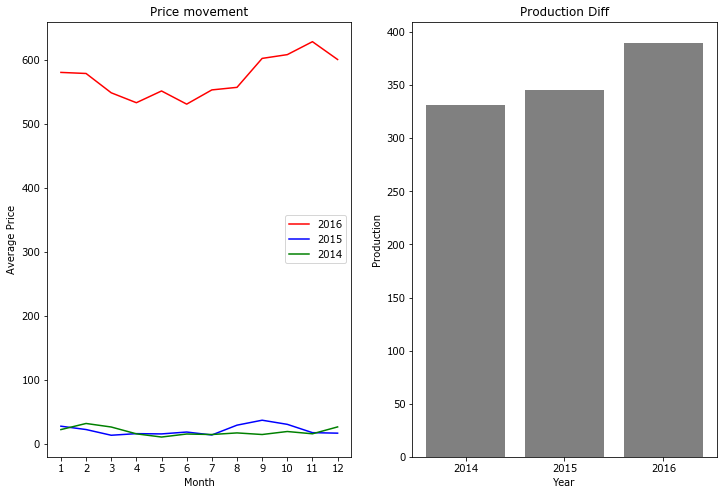

In [19]:
compare_vege_price(veges, agri_price, '金針菜')

In [74]:
#how to find all fonts available
import matplotlib.font_manager
#matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')